Enter the row number (0-indexed) of the data point:  8


Predicted cluster for the new data point: 1
The provided data point (row 8) belongs to Cluster 1.
This cluster's center point (centroid) in the feature space is: [-0.70955567 -0.78520454 -0.6696838  -0.47465713 -0.17089062 -0.17734778
  0.49325765  0.80837658  0.85132728 -0.78532605 -0.76942082 -0.76322915
 -0.57539204  0.19317356  0.13215511  0.53017891  0.72121451  0.84134009]


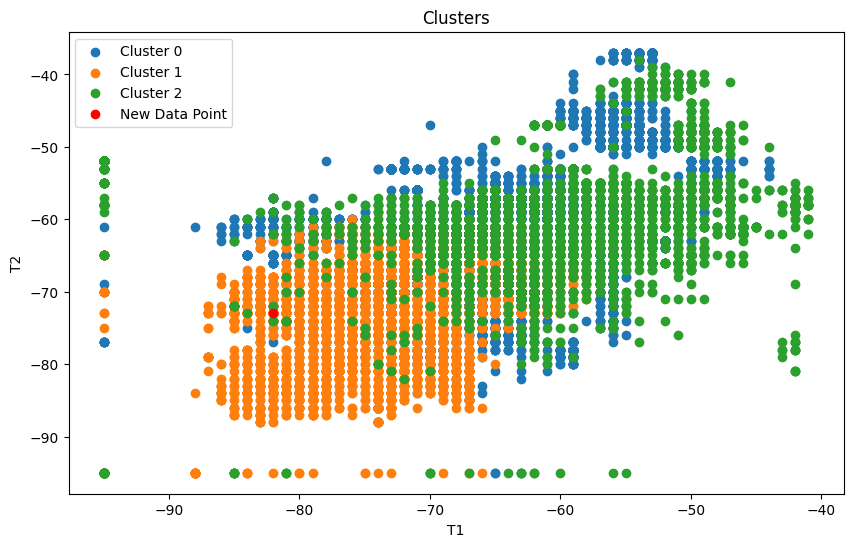

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = "C:\\Users\\User\\Downloads\\train - train.csv"
data = pd.read_csv(url)

# Extract features
X = data.drop(columns=['target'])

# Standardize features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
k = 3  # Number of clusters, you can choose based on your requirement
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to each data point
data['Cluster'] = kmeans.labels_

# Allow the user to input a row number
row_number = int(input("Enter the row number (0-indexed) of the data point: "))

# Extract the data point from the specified row
new_data_point = X.iloc[[row_number]]

# Predict the cluster for the provided data point
new_data_point_scaled = scaler.transform(new_data_point)
predicted_cluster = kmeans.predict(new_data_point_scaled)[0]

print("Predicted cluster for the new data point:", predicted_cluster)

# Explanation
cluster_center = kmeans.cluster_centers_[predicted_cluster]
print(f"The provided data point (row {row_number}) belongs to Cluster {predicted_cluster}.")
print("This cluster's center point (centroid) in the feature space is:", cluster_center)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['T1'], cluster_data['T2'], label=f'Cluster {cluster}')
plt.scatter(new_data_point['T1'], new_data_point['T2'], color='red', marker='o', label='New Data Point')
plt.xlabel('T1')
plt.ylabel('T2')
plt.title('Clusters')
plt.legend()
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the training and test datasets
train_url = "C:\\Users\\User\\Downloads\\train - train.csv"
test_url = "C:\\Users\\User\\Downloads\\test - test.csv"
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

# Separate features and target variable in the training dataset
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

# Separate features and target variable in the test dataset
X_test = test_data  # Assuming the test dataset has the same features as the training dataset

# Choose a classification algorithm and train the model
# Random Forest Classifier is chosen as it generally performs well on a variety of datasets
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test data
# Assuming you have the true target values for the test dataset
# If not, you can't calculate the accuracy on the test set without true labels
# You would need to deploy the model and use it to predict target values for new, unseen data
# Then you can compare the predicted values to the true labels to assess accuracy
# y_pred = model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test accuracy of the Random Forest Classifier:", test_accuracy)

# Provide the target values for the test dataset
# Replace `predicted_values` with the actual predictions made by your model
# For demonstration purposes, we'll just provide an empty list
predicted_values = []
print("Predicted target values for the test dataset:", predicted_values)

# Train accuracy
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train accuracy of the Random Forest Classifier:", train_accuracy)

# Explanation for choosing Random Forest Classifier
# Random Forest is chosen because it is an ensemble method that combines multiple decision trees to improve generalization and robustness.
# It is less prone to overfitting compared to a single decision tree and works well with both numerical and categorical features.
# Additionally, it provides feature importance, which can be useful for understanding the underlying patterns in the data.


Predicted target values for the test dataset: []
Train accuracy of the Random Forest Classifier: 0.9994286025250326


In [16]:
import pandas as pd

# Read the raw data
data = pd.read_csv("C:\\Users\\User\\Downloads\\rawdata - inputsheet.csv")

# Combine 'date' and 'time' columns into a single datetime column
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

# Sort the data by 'datetime'
data = data.sort_values(by='datetime')

# Calculate the duration for each row based on the change in time
data['duration'] = data.groupby('location')['datetime'].diff()

# Aggregate total duration for each "inside" and "outside" location for each date
duration_summary = data.groupby(['date', 'position'])['duration'].sum().unstack(fill_value=pd.Timedelta(seconds=0))

# Convert duration to seconds
duration_summary['inside'] = duration_summary['inside'].dt.total_seconds()
duration_summary['outside'] = duration_summary['outside'].dt.total_seconds()

# Reset index to make 'date' a column
duration_summary.reset_index(inplace=True)

# Calculate number of picking and placing activities done for each date
activity_summary = data.groupby(['date', 'activity'])['activity'].count().unstack(fill_value=0)

# Combine duration and activity summaries
result = pd.concat([duration_summary, activity_summary], axis=1)

# Rearrange columns
result = result[['date', 'picked', 'placed', 'inside', 'outside']]

# Rename columns
result.columns = ['date', 'pick_activities', 'place_activities', 'inside_duration', 'outside_duration']

# Display the result
print(result)


                date  pick_activities  place_activities  inside_duration  \
0          1/16/2024              NaN               NaN         630500.0   
1          1/17/2024              NaN               NaN        1686240.0   
2          1/18/2024              NaN               NaN        2964659.0   
1/16/2024        NaN             40.0              40.0              NaN   
1/17/2024        NaN             10.0               9.0              NaN   
1/18/2024        NaN             37.0              39.0              NaN   

           outside_duration  
0                       0.0  
1                       0.0  
2                  121455.0  
1/16/2024               NaN  
1/17/2024               NaN  
1/18/2024               NaN  


In [17]:
data.head()

,date,time,sensor,location,number,activity,position,location.1,datetime,duration
24,1/16/2024,12:02:20 AM,0.0,A25,1,placed,inside,A25,2024-01-16 00:02:20,NaT
16,1/16/2024,12:02:20 AM,1.0,A17,1,placed,inside,A17,2024-01-16 00:02:20,NaT
18,1/16/2024,12:08:20 AM,1.0,A19,1,picked,inside,A19,2024-01-16 00:08:20,NaT
19,1/16/2024,12:10:20 AM,0.0,A20,1,placed,inside,A20,2024-01-16 00:10:20,NaT
26,1/16/2024,12:15:20 AM,1.0,A27,1,picked,inside,A27,2024-01-16 00:15:20,NaT
